# Визуализация.

Датасет представляет собой коллекцию медицинских и демографических данных пациентов, а также их статус диабета (положительный или отрицательный). Данные включают такие характеристики, как возраст, пол, индекс массы тела (ИМТ), гипертония, сердечно-сосудистые заболевания, история курения, уровень HbA1c и уровень глюкозы в крови. 

В будущем этот датасет может быть использован для построения моделей машинного обучения для прогнозирования диабета у пациентов на основе их истории болезни и демографической информации. Это может быть полезно для медицинских работников при выявлении пациентов, которые могут быть подвержены риску развития диабета, и при разработке персонализированных планов лечения.

Описание столбцов:

|Название| Описание |
|--|--|
|`gender`| Пол пациента |
|`age`| Возраст |
|`hypertension`| Гипертония —  это состояние, при котором кровяное давление в артериях постоянно повышено. Он принимает значения 0 или 1, где 0 означает отсутствие гипертонии, а 1 —  наличие гипертонии. |
|`heart_disease`| Болезни сердца —  это еще одно состояние, которое связано с повышенным риском развития диабета. Он также принимает значения 0 или 1, где 0 означает отсутствие сердечных заболеваний, а 1 —  наличие сердечных заболеваний. |
|`smoking_history`| Опыт курения —  также считается фактором риска развития диабета и может усугубить осложнения, связанные с диабетом. | 
|`bmi`| Это показатель количества жира в организме, основанный на весе и росте. Более высокие значения ИМТ связаны с повышенным риском развития диабета. Диапазон ИМТ в наборе данных составляет от 10,16 до 71,55. ИМТ менее 18,5 —  это недостаточный вес, 18,5-24,9 —  нормальный, 25-29,9 —  избыточный вес, а 30 и более —  ожирение. |
|`HbA1c_level`| Уровень HbA1c (гемоглобин A1c) —  это показатель среднего уровня сахара в крови человека за последние 2-3 месяца. Более высокий уровень указывает на больший риск развития диабета. В основном более 6,5% уровня HbA1c указывает на диабет. | 
|`blood_glucose_level`| Уровень глюкозы в крови —  это количество глюкозы в крови в определенный момент времени. Высокий уровень глюкозы в крови является основным признаком диабета. |
|`diabetes`| Диабет является целевой переменной (таргетом), при этом значение 1 указывает на наличие диабета, а 0 —  на его отсутствие. |

## Задание

Проведите визуализацию данных и попробуйте выяснить причины, от чего и с чем связаны основные причины наличия диабета у людей.

Ваша цель —  визуально с помощью графиков определить и доказать, что при наличии какого-либо фактора возможен риск развития диабета.

Этапы выполнения задания (наш pipeline):

1. Загрузка и предобработка данных (при необходимости)
2. Описательный анализ данных, просмотр данных
3. Построение гистограмм числовых переменных
4. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
5. Построение столбчатых диаграмм для категориальных переменных
6. Построение матрицы корреляции признаков (Phik или Пирсона)
7. Сравнение двух выборок
8. Общий вывод

## Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
display(df.sample(5))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
81681,Female,17.0,0,0,current,37.20,6.2,130,0
22711,Female,17.0,0,0,No Info,25.76,6.5,145,0
84380,Female,40.0,0,0,current,27.32,6.6,130,0
67868,Female,25.0,0,0,current,21.97,4.8,145,0
5972,Male,24.0,0,0,No Info,27.32,6.6,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


## Описательный анализ данных

Рассмотрите данные —  изучите медианы, средние, дисперсии и т.д. 

Что можете сказать о данных? Сделайте вывод.

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [7]:
df.duplicated().sum()

np.int64(3854)

**Вывод:**
1. В таблице 100000 строк и 9 столбцов
2. Типы данных обозначены верно для каждого столбца
3. Нулевых значений на первый взгляд нет
4. Имеется 2854 дубликата
5. Средний возраст людей в генеральной совокупности примерно 42 года
6. Самому младшему чуть меньше месяца
7. Самому старшему 80 лет
8. У большинства участников нет гипертонии
9. У большинства нет болейзней сердца
10. В среднем у участников имеется избыточный вес
11. В среднем у участников имеют нормальный гемоглобин
12. В среднем есть риск развития диабета, тк их уровень глюкозы в крови близок к критическому (показан уровень гемоглобина в мг на 100 мл крови)
13. У большинства участников нет диабета

## Предобработка данных

### Дубликаты

Предобработайте датасет —  проверьте на наличие дубликатов и удалите, если они есть.

In [8]:
df.duplicated().sum()

np.int64(3854)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.shape

(96146, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


### Отсутствующие значения

Предобработайте датасет — проверьте на наличие NaN и удалите или заполните значения.

In [13]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [14]:
for col in df:
    if df[col].dtype == 'object':
        nans = df[col].apply(lambda x: len(x.strip())==0).sum()
        if nans > 0:
            print(f'Неявные пропуски столбца `{col}`:', df[col].apply(lambda x: len(x.strip())==0).sum())
        else:
            print(f'Неявных пропусков у столбца `{col}` нет')

Неявных пропусков у столбца `gender` нет
Неявных пропусков у столбца `smoking_history` нет


In [15]:
display(df.dtypes)

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [16]:
# pd.to_numeric(df[df.columns], errors='coerce')

### Изменение типа данных

Рассмотрев все данные, замените типы на нужные (при необходимости):

- Если есть числа — на `int` или `float`
- Если категории — можно оставить `object`

In [17]:
df.sample(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
57660,Female,43.00,0,0,never,32.02,6.5,200,0
79111,Female,32.00,1,0,current,29.28,3.5,90,0
47434,Male,80.00,1,0,former,30.44,6.5,126,0
39461,Male,61.00,0,0,never,24.15,8.2,160,1
16720,Male,65.00,0,1,current,36.25,6.8,220,1
23612,Female,27.00,0,0,never,33.07,6.2,145,0
47668,Male,50.00,0,0,current,30.45,6.6,155,0
68549,Male,0.88,0,0,No Info,27.32,4.5,130,0
90276,Female,27.00,0,0,No Info,27.32,5.7,145,1
57670,Male,62.00,0,0,former,29.25,6.2,126,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [19]:
df['age'] = df['age'].astype(int)
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
13235,Male,62,0,0,ever,31.96,8.8,155,1
35173,Female,45,0,0,ever,38.18,6.2,85,0
37102,Female,67,0,0,No Info,41.11,6.5,280,1
76039,Female,51,0,0,ever,19.40,3.5,160,0
23017,Female,32,0,0,current,19.08,5.8,158,0


**Вывод:**
- Был изменен тип данных у age, чтобы показывалось круглое число

## Визуализация

Построим графики:

1. Построение гистограмм числовых переменных
2. Построение диаграмм размаха для определения наличия выбросов (ящики с усами) числовых переменных
3. Построение столбчатых диаграмм для категориальных переменных
4. Построение матрицы корреляции признаков (Phik или Пирсона)

После построения опишите выборку. Что она из себя представляет? Есть ли зависимости?

In [20]:
df.sample(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
54548,Male,38,0,0,No Info,27.32,6.0,200,0
62222,Female,33,1,0,former,27.32,6.6,200,0
42677,Female,28,0,0,No Info,33.78,5.7,160,0
23948,Female,69,0,0,never,23.54,4.0,80,0
75834,Female,40,0,0,never,32.04,6.1,158,0


In [21]:
df.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

### Непрерывные столбцы, которые визуализируем через гистограмму

- age
- bmi
- HbA1c_level
- blood_glucose_level

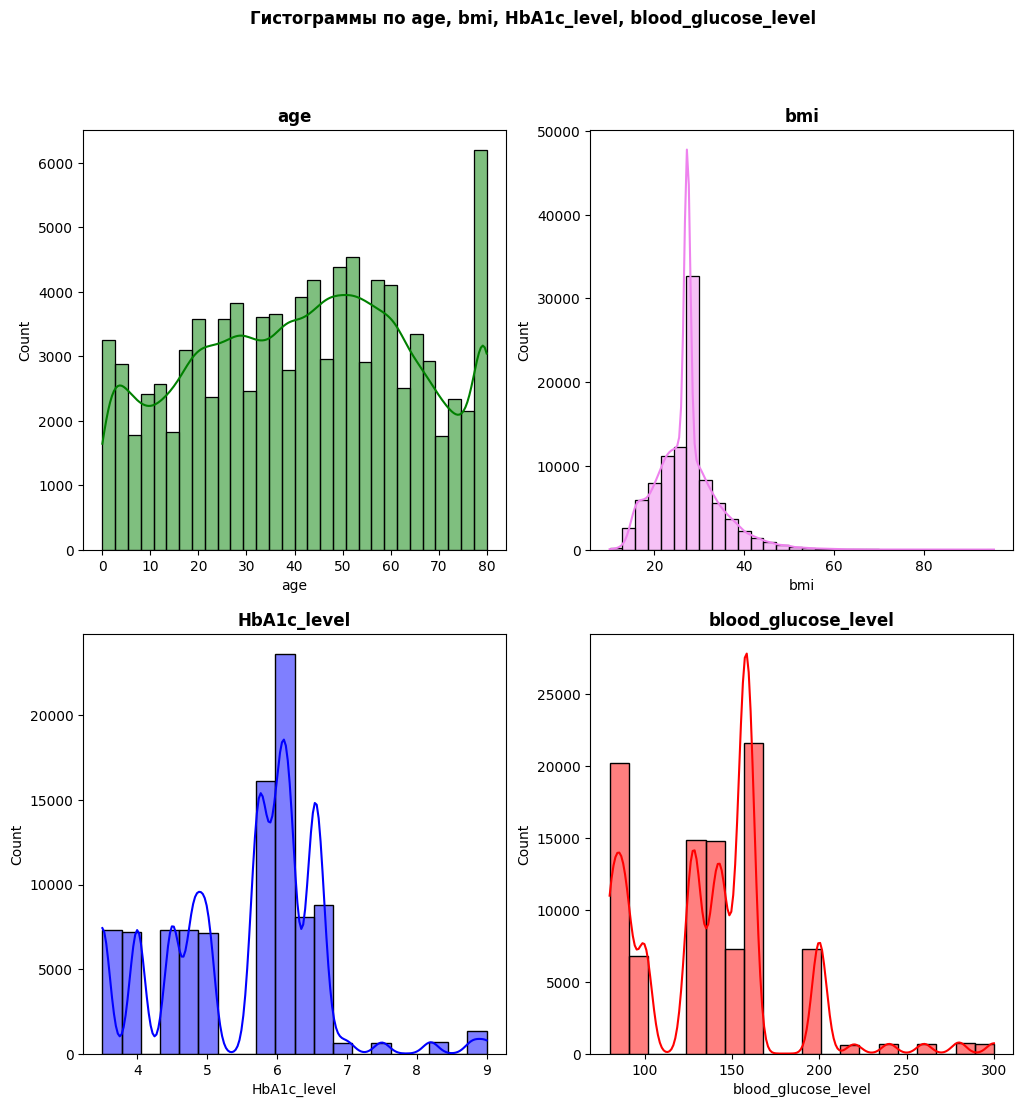

In [22]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
colors = ['green', 'violet', 'blue', 'red']
indexes = [[0, 0], [0, 1], [1, 0], [1, 1]]


fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle('Гистограммы по age, bmi, HbA1c_level, blood_glucose_level', weight='bold')

for index, col, color in zip(indexes, cols, colors):
    x, y= index
    bin = 30 if x == 0 else 20
    sns.histplot(df[col], bins=bin, kde=True, color=color, ax=ax[x, y])
    ax[x, y].set_title(col, weight='bold')
    ax[x, y].set_xlabel(col)

plt.show()

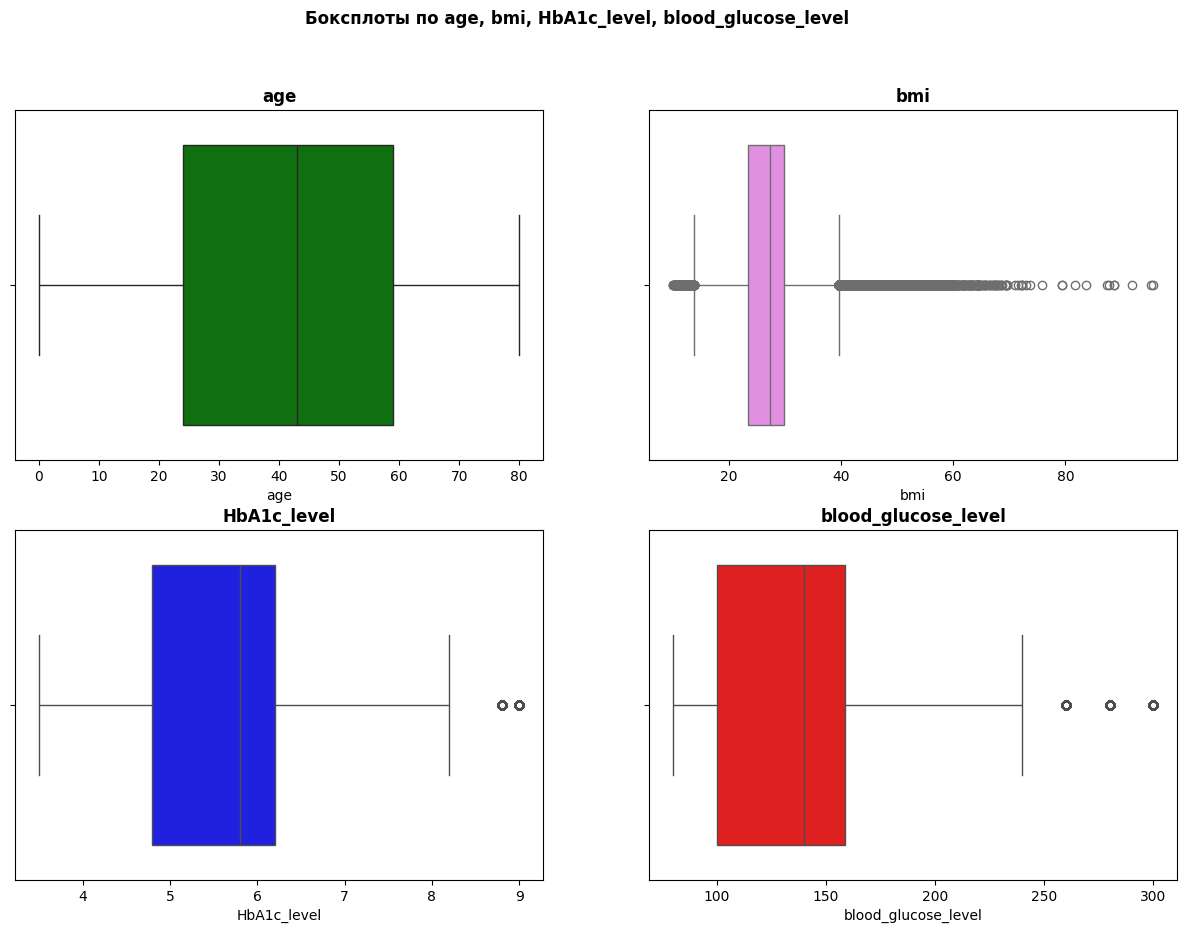

In [23]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
colors = ['green', 'violet', 'blue', 'red']
indexes = [[0, 0], [0, 1], [1, 0], [1, 1]]


fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Боксплоты по age, bmi, HbA1c_level, blood_glucose_level', weight='bold')

for index, col, color in zip(indexes, cols, colors):
    x, y= index
    sns.boxplot(df[col], orient='h', color=color, ax=ax[x, y])
    ax[x, y].set_title(col, weight='bold')
    ax[x, y].set_xlabel(col)

plt.show()

## Дискретные величины 
- gender
- hypertension
- heart_disease
- smoking_history
- diabetes

In [24]:
df.gender.value_counts()

gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64

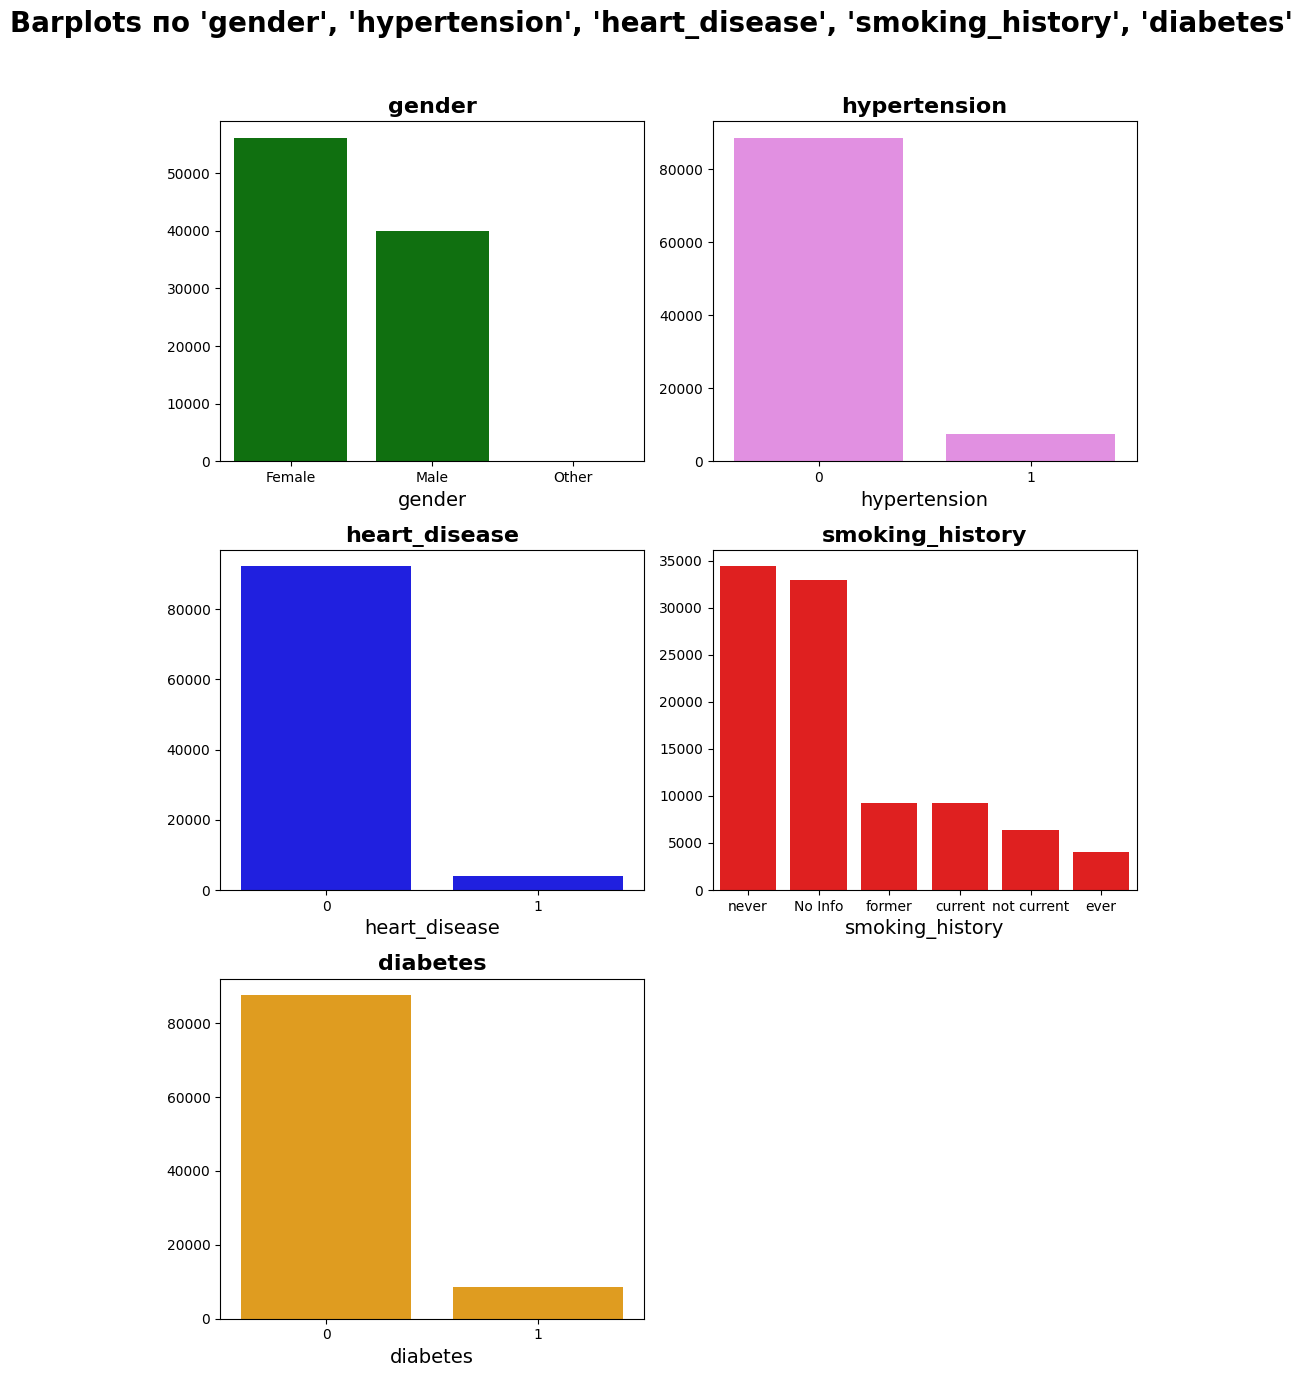

In [25]:
colors = ['green', 'violet', 'blue', 'red', 'orange']
indexes = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0]]
cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']

fig, ax = plt.subplots(3, 2, figsize=(10, 14))
fig.suptitle("Barplots по 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes'", fontsize=20, weight='bold')

for index, col, color in zip(indexes, cols, colors):
    x, y = index
    tmp = df[col].value_counts()

    sns.barplot(x=tmp.index, y=tmp.values, color=color, ax=ax[x, y])
    ax[x, y].set_title(col, weight='bold', fontsize=16)
    ax[x, y].set_xlabel(col, fontsize=14)
    ax[x, y].set_ylabel('')
    ax[x, y].tick_params(axis='x')

fig.delaxes(ax[2, 1])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [26]:
df.dtypes

gender                  object
age                      int64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [27]:
df_without_objects = df.copy()
encoded_columns = {}
for col in ['gender', 'smoking_history']:
    df_without_objects[col], unique = pd.factorize(df_without_objects[col])


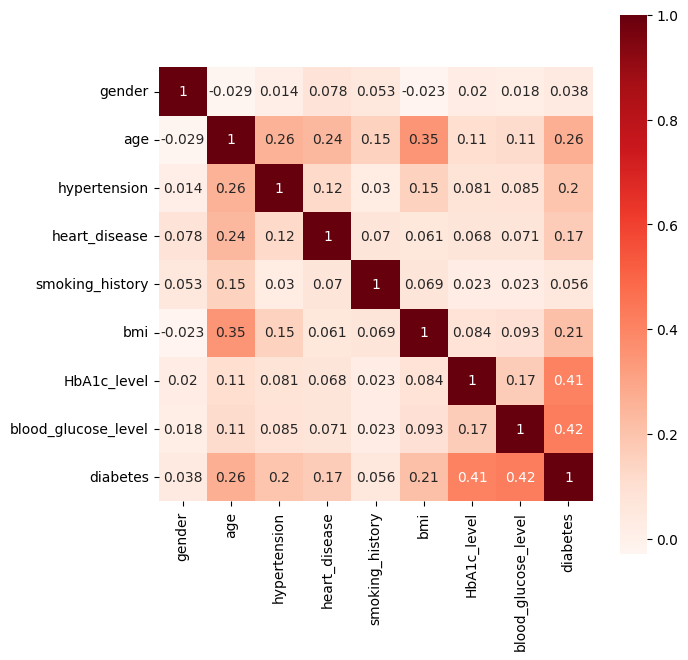

In [28]:
tmp = df_without_objects.corr()

plt.figure(figsize=(7, 7))
sns.heatmap(tmp, annot=True, cmap='Reds')
plt.imshow(tmp)
plt.show()

**Вывод:**
1. В целом данные `возраста` распределены нормально
2. Возраст `80` лет имеет аномальное значение. Возможно тут имеется в виду `80+` лет
3. График частот показал, что у большинства нет `гипертонии`
4. У большинста нет `болезней сердца`
5. У большинства есть `избыточный вес`
6. Большинство людей близки к тому, чтобы заболеть диабетом, тк их уровень `гемоглобина` близок к критическому
7. У многих уровень `глюкозы` в крови близок к критическому
8. Женщин больше мужчин
9. У большинства нет `гипертонии`
10. У большинства нет `болезней сердца`
11. Большинство никогда `не курили`, но также есть некоторая доля курильщиков
12. У большинства нет `диабета`
13. Наличие `диабета` немного коррелирует с `возрастом`
14. А так же может немного зависеть от уровня `глюкозы` в крови и `гемоглобина`

## Сравнение выборок

После построения всех типов графиков, необходимо провести анализ:

Отобразите на одном графике две выборки — люди с диабетом и без и сравните их.

1. Для числовых признаков — гистограммы и ящики с усами.
2. Для категориальных — столбчатые диаграммы.

После напишите вывод, есть ли какая-то зависимость?

In [29]:
df_diabetes = df.loc[df['diabetes'] == 1]
df_without_diabetes = df.loc[df['diabetes'] == 0]
display(df_diabetes.sample(5))
display(df_without_diabetes.sample(5))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
45821,Female,29,0,0,not current,50.83,5.8,126,1
78135,Male,80,1,0,never,39.25,6.5,155,1
66010,Female,80,1,0,No Info,30.29,6.5,300,1
35012,Female,80,1,0,former,25.60,5.7,145,1
28980,Male,67,0,1,No Info,28.01,6.6,300,1


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
55413,Male,32,0,0,never,26.74,5.7,90,0
61279,Female,54,0,0,No Info,26.39,5.7,130,0
19598,Male,34,0,0,never,38.72,4.5,100,0
68594,Female,66,0,0,No Info,27.32,5.0,140,0
70384,Male,69,0,1,never,26.14,4.5,200,0


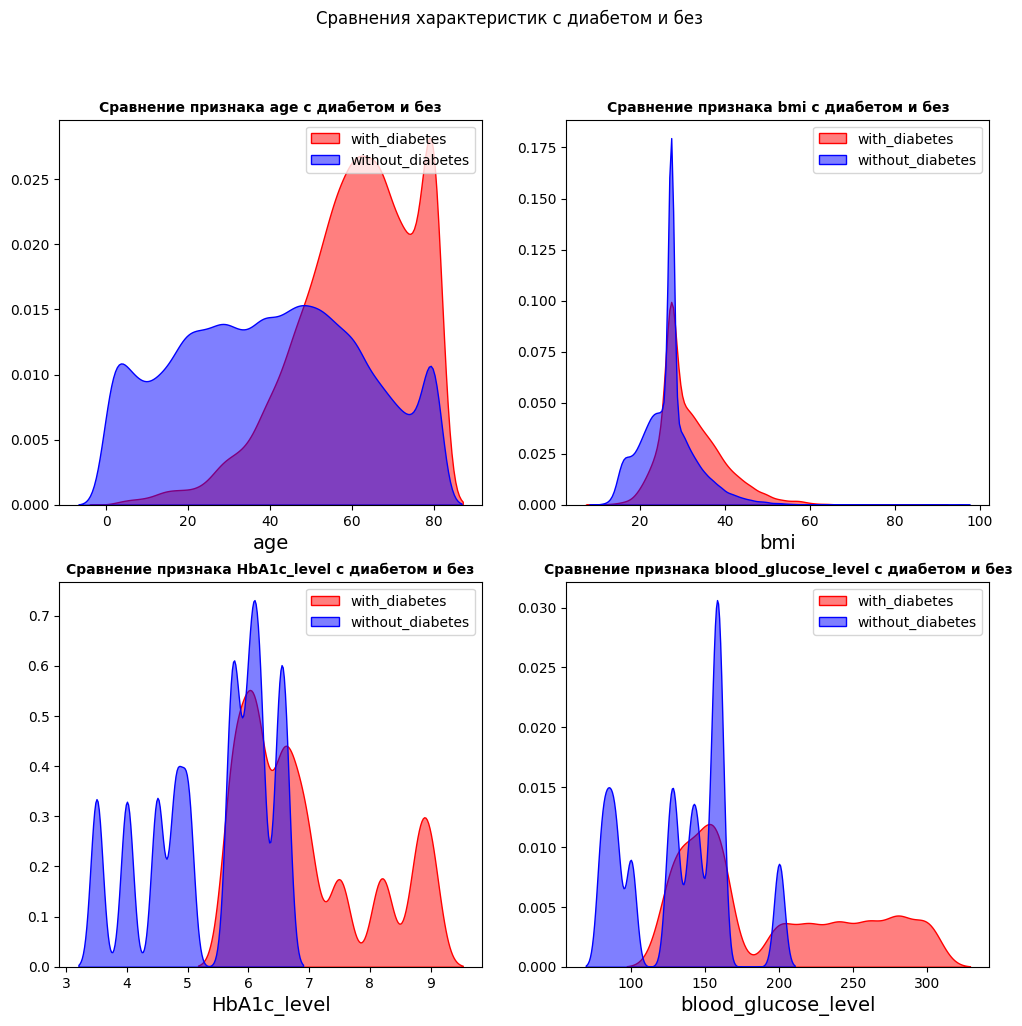

In [30]:
cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
indexes = [[0, 0], [0, 1], [1, 0], [1, 1]]

fig, ax = plt.subplots(2, 2, figsize=(12, 11))
fig.suptitle('Сравнения характеристик с диабетом и без')

for index, col in zip(indexes,cols):
    x, y = index

    data1 = df_diabetes[col]
    data2 = df_without_diabetes[col]

    sns.kdeplot(data1, ax=ax[x, y], color='red', label='with_diabetes', alpha=0.5, fill=True)
    sns.kdeplot(data2, ax=ax[x, y], color='blue', label='without_diabetes', alpha=0.5, fill=True)
    ax[x, y].set_title(f'Сравнение признака {col} с диабетом и без', weight='bold', fontsize=10)
    ax[x, y].legend(loc='upper right')
    ax[x, y].set_xlabel(col, fontsize=14)
    ax[x, y].set_ylabel('')

plt.show()

In [31]:
# df_diabetes_sample = df_diabetes.sample(5000)
# df_without_diabetes_sample = df_without_diabetes.sample(5000)

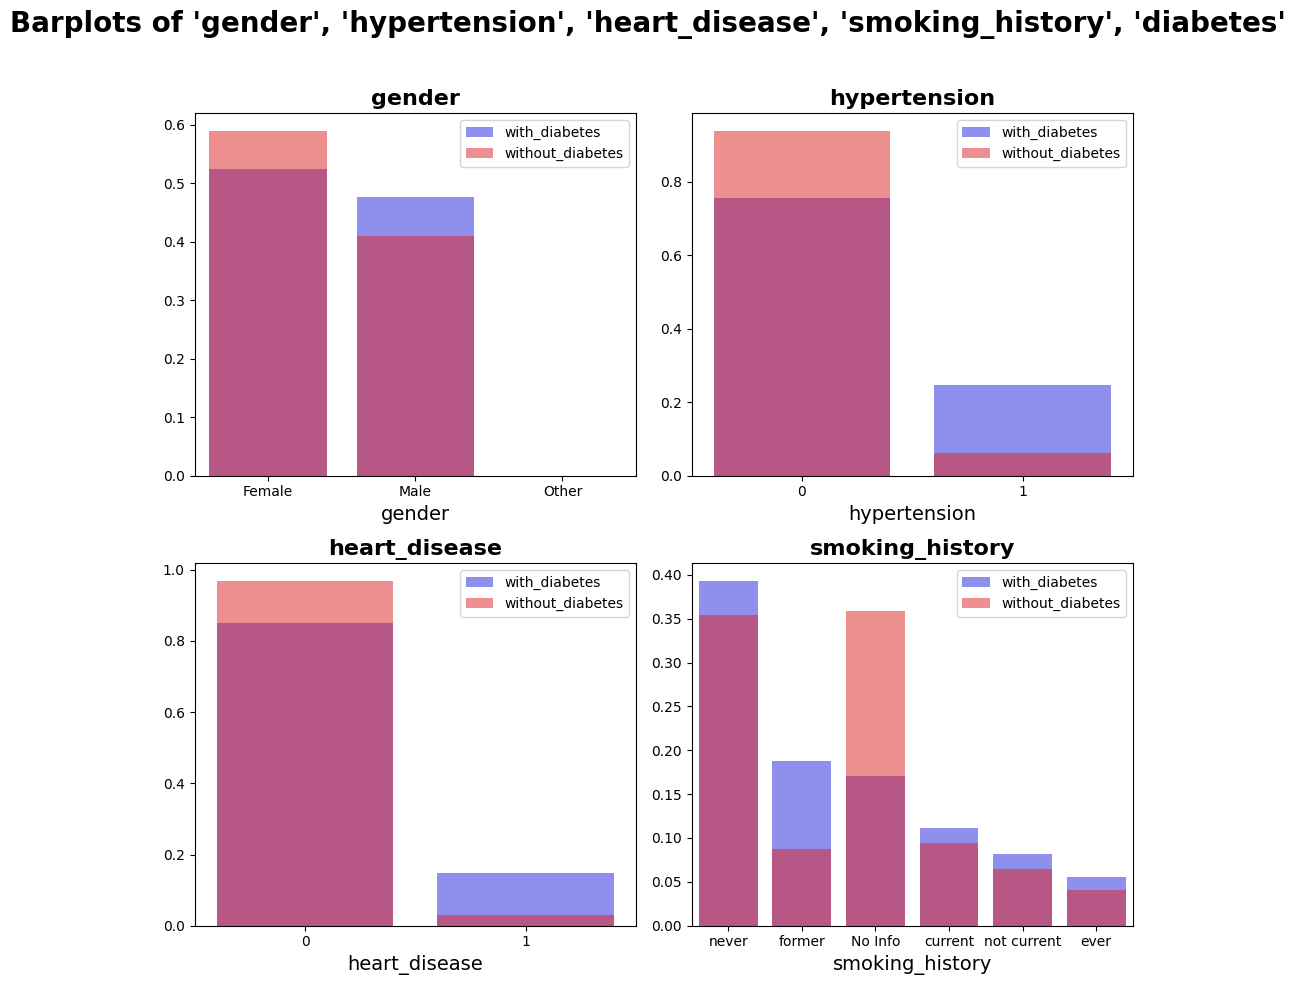

In [32]:
indexes = [[0, 0], [0, 1], [1, 0], [1, 1]]
cols = ['gender', 'hypertension', 'heart_disease', 'smoking_history']

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Barplots of 'gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes'", fontsize=20, weight='bold')

for index, col in zip(indexes, cols):
    x, y = index
    tmp_with = df_diabetes[col].value_counts(normalize=True)
    tmp_without = df_without_diabetes[col].value_counts(normalize=True)

    sns.barplot(x=tmp_with.index, y=tmp_with.values, color='blue', ax=ax[x, y], alpha=.5, label='with_diabetes')
    sns.barplot(x=tmp_without.index, y=tmp_without.values, color='red', ax=ax[x, y], alpha=.5, label='without_diabetes')
    ax[x, y].set_title(col, weight='bold', fontsize=16)
    ax[x, y].set_xlabel(col, fontsize=14)
    ax[x, y].set_ylabel('')
    ax[x, y].tick_params(axis='x')
    ax[x, y].legend(loc='upper right')


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Вывод:**
Из графиков видно, что
1. Диабет развит в основном у пожилых людей
2. У людей с ожирением чуть чаще встречается диабет
3. У людей с высоким уровнем гемоглобина чаще встречается диабет
4. У людей с высоким уровнем глюкозы в крови чаще встречается диабет
5. Среди мужчин чаще встречаются люди с диабетом
6. Среди женщин больше тех, у кого не наблюдается диабет
7. Курение особо не влияет на риск развития диабета

## ЗАДАЧИ PRO

Мы провели базовый анализ выше и сделали выводы.

Но даёт ли этот результат полную картину? Наша цель — узнать, каков риск возникновения диабета у пациента.

Ваша задача — воспользоваться ранее приобретенными навыками и дополнить общий вывод. 

**Этапы:**

1) Разделите выборки и постройте дополнительные графики. Может стоит разделить на несколько выборок и сравнить графики там?
2) Постройте `pairplot` с параметром `hue=='diabetes'`. Может там тоже где-то кроется истина?
2) Постройте тепловую карту корреляции `Phik` и сделайте дополнительный вывод.
3) Дополните общий вывод. 

**Примечание:** задание не ограничено только этими этапами. Можно их дополнить — может стоит сделать фильтр данных, рассмотреть данные под другим углом и провести дополнительную аналитику? Средствами и методами не ограничены.

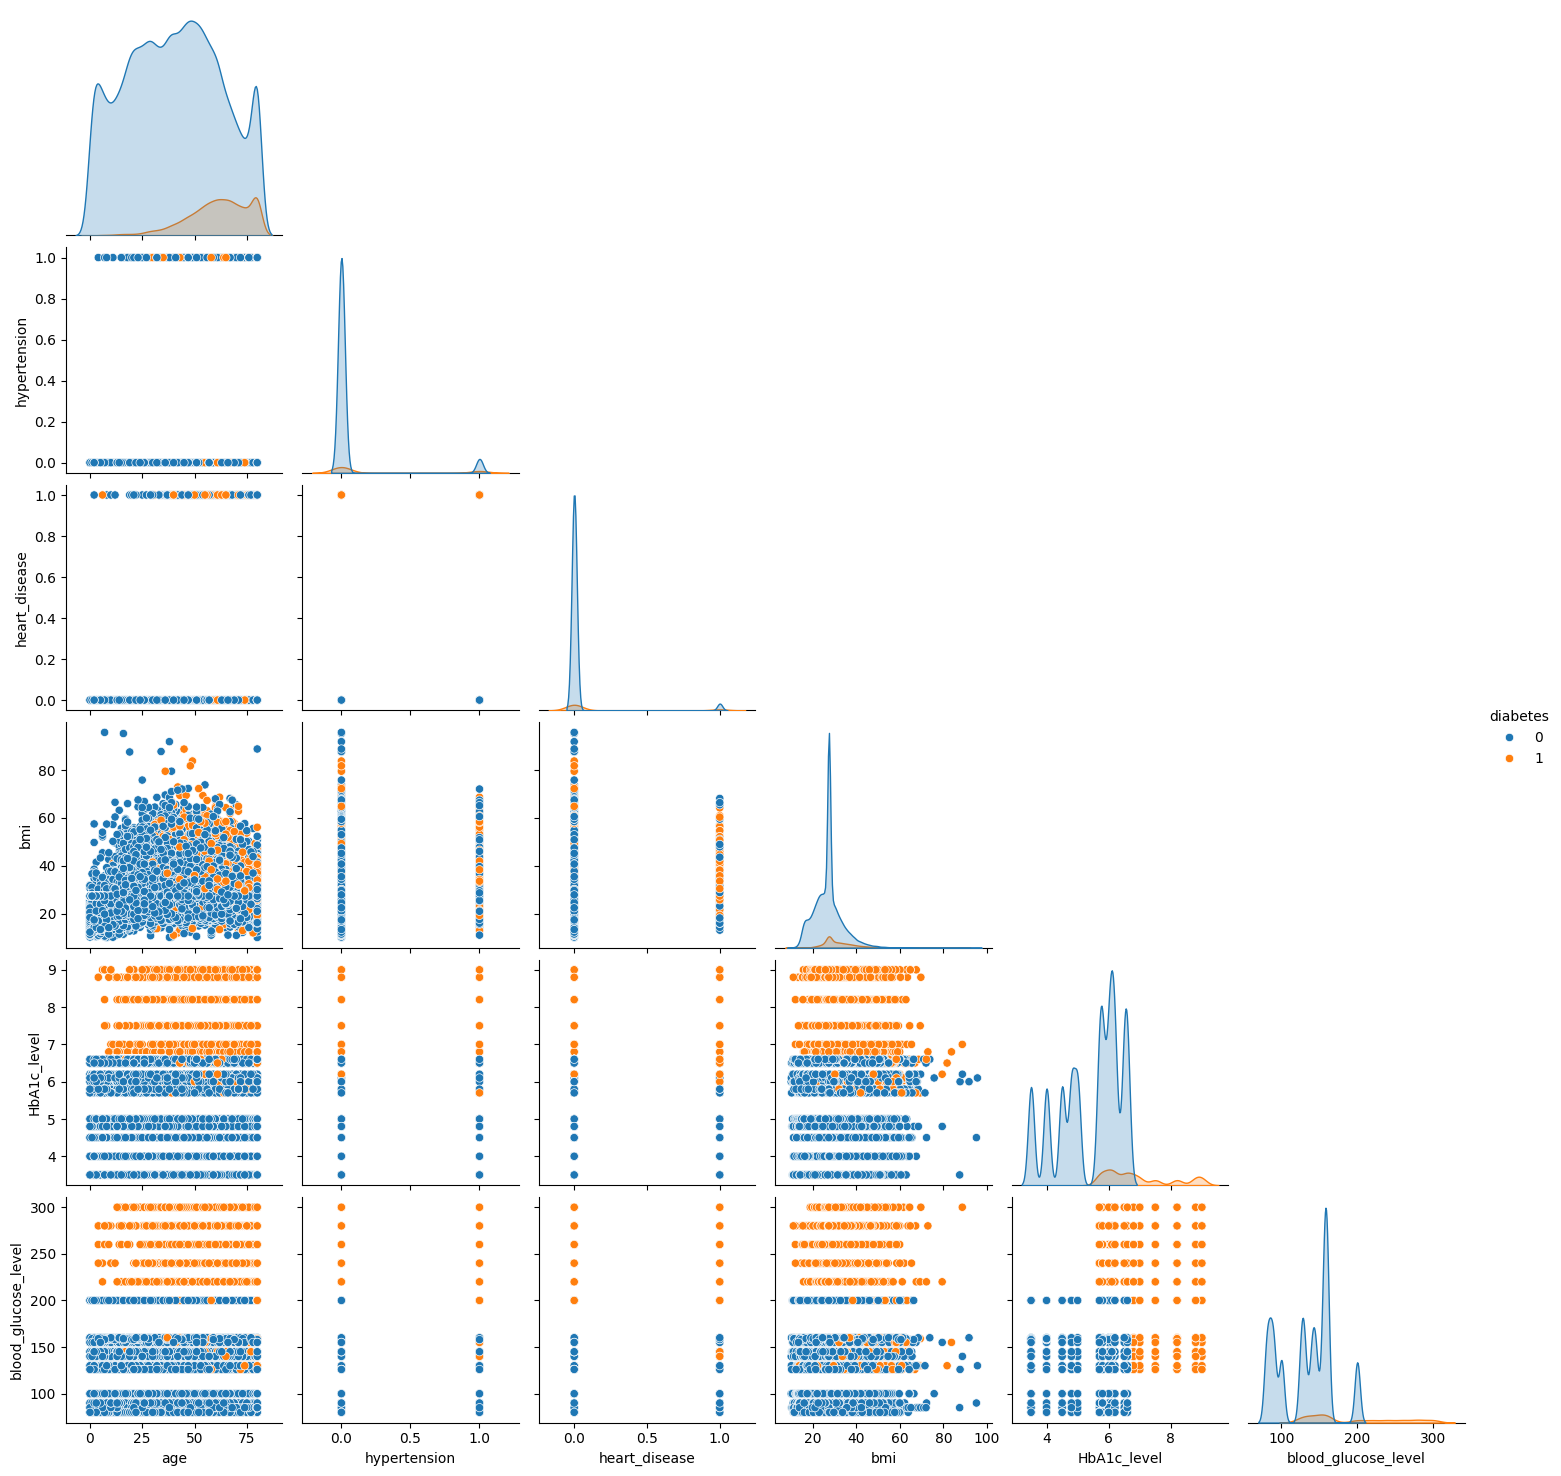

In [36]:
sns.pairplot(df, hue='diabetes', diag_kind='kde', corner=True)
plt.show()

interval columns not set, guessing: ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


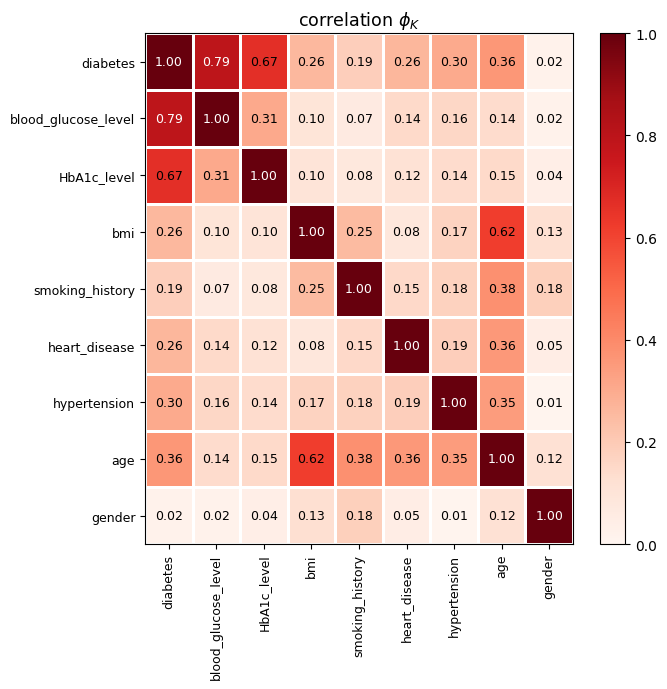

In [34]:
phik_overview = df.phik_matrix()

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Reds", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.9, figsize=(7, 7))
plt.tight_layout()
plt.show()

# Общий вывод

Опишите данные и результат исследования, основываясь на предыдущих шагах:
1. На диабет никак не влияет только `гендер`
2. Сильная корреляция только с уровнем `глюкозы` и `гемоглобина`
3. В меньшей степени на наличие диабета влияет только курение